In [1]:
from qiskit import *
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_histogram
import random

<h1>Deutsch-Jozsa Algorithm</h1>
<p>Given $\ket{x}$, a n-bit string, we want to know if $f(x)$ is balanced or constant.</p>
<p>$f(x)$ is constant when, for any $x$, the same value is returned.</p>
<p>$f(x)$ is balanced when, for half of the possible values of $x$, $f(x) = 1$ and for the other half $f(x) = 0$</p>
<p>The algorithm is basically the same of Deutsch single qubit problem, but now, escalating it to solve for n qubits:</p>
<p></p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 1: Prepare 2 quantum registers initialized with zeroes: the first is the n-qubit $\ket{x}$ and the second is the answer of the oracle $\ket{y}$</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 2: Superpose all the qubits with the Hadamard Gate</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 3: Flip $\ket{y}$ to store the result in the phase</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 4: Apply the Oracle:</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a: If the oracle is constant, it applies the identity if the constant case is 0, or apply X gates if the case is 1</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b: If the oracle is balanced, it applies CNOTs to every bit in $\ket{x}$ and adds the phase kickback to half of the states</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c: We define a hidden parameter $a$ that is a random bit string that is not 0 (so, a number between 1 and $2^n$) to check if the CNOT will be applied  </p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 5: Apply Hadamard to $\ket{x}$</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp; 4: Measure $\ket{x}$, if $\ket{x} = 0$ then $f(x)$ is constant, otherwise it is balanced</p>
<p>Lets check the implementantion. First, we define the oracle: </p>
<p></p>

In [2]:
cases = ['balanced', 'constant']

In [3]:
def superposition(circuit, n):
    for i in range(n):
        circuit.h(i)
    circuit.barrier()

In [4]:
def dj_oracle(circuit, n):
    #Randomly chooses one of the cases and values for the oracle
    case = random.choice(cases)
    value = random.randint(0,1)
    if case == 'constant':
        print('Oracle is constant')
        if value == 1:
            circuit.x(n)
        else:
            circuit.id(n)
    else:
        a = random.randint(1,2**n)
        print('Oracle is balanced, hidden parameter = ' + str(a))
        for i in range(n):
            if (a & (1 << i)):
                print('CNOT on q' + str(i))
                circuit.cx(i, n)
    circuit.barrier()

In [5]:
def dj_circuit(n):
    circuit = QuantumCircuit(n+1, n)
    #apply X and H to |y>
    circuit.x(n)
    circuit.h(n)
    #apply hadamard on |x>
    superposition(circuit, n)   
    #apply the Oracle
    dj_oracle(circuit, n)
    #apply hadamard to |x>
    superposition(circuit, n)
    #measure |x>
    for i in range(n):
        circuit.measure(i,i)
    return circuit

Oracle is balanced, hidden parameter = 165
CNOT on q0
CNOT on q2
CNOT on q5
CNOT on q7


C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


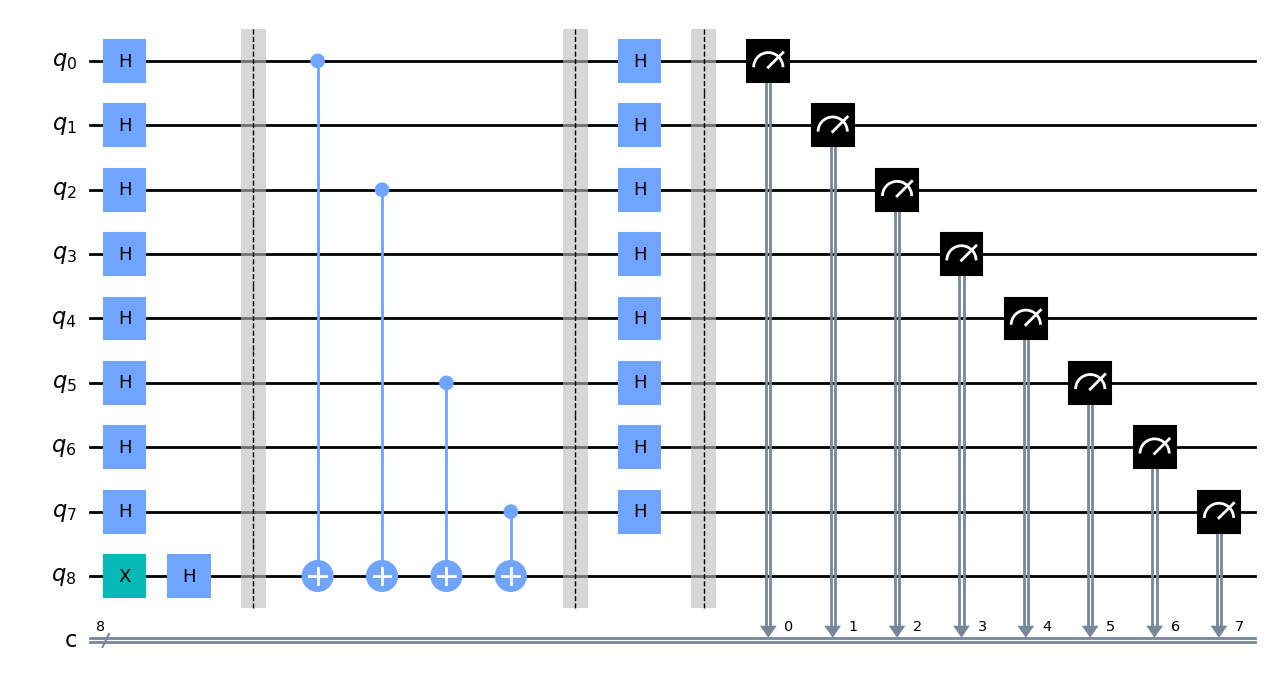

In [6]:
circuit = dj_circuit(8)
circuit.draw("mpl")

<p>Running the circuit in a local simulator we have the following results: </p>

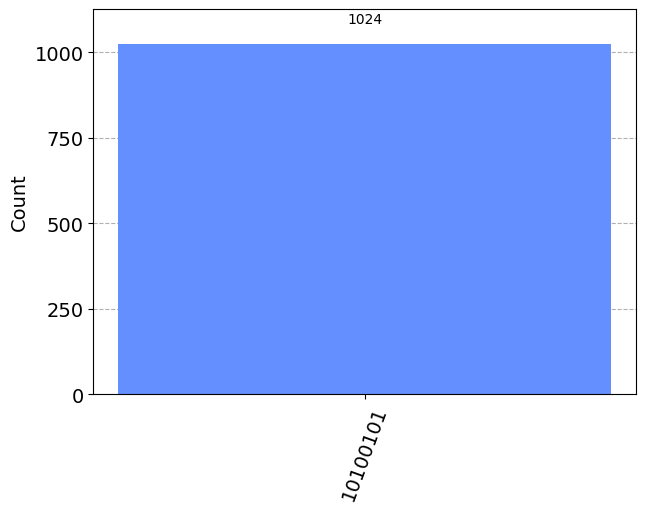

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(circuit).result()
answer = results.get_counts()

plot_histogram(answer)

<p>There are many ways to implement the oracle, another forms can make use of X gates for example.</p>
<p>As we can see, the result shows us a balanced bit string (if the oracle case is balanced) and a constant bit string (if it is the case)</p>